In [1]:
#we want to study one of the biggest sales retailers to find out the factors which influences its revenue, And how does machine learning minimize costs and increase economic impact?

In [2]:
#importing libraribes and dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [3]:
df = pd.read_csv(r"C:\Users\Abdullahi\Desktop\finance and health datasets\Walmart_sales.csv")

In [4]:
#to display the first 5 rows of the dataset
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [5]:
#to get the total number of rows, columns and datatypes of each column and memory requirements
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [6]:
#to get the overall statistics of the dataset
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [7]:
#to check for null values in numbers
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [8]:
#to drop the dat column as it is not required in this case
df = df.drop('Date', axis=1)

In [9]:
df

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...
6430,45,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,718125.53,0,56.47,3.969,192.330854,8.667


# Visualization

C:\Users\Abdullahi\anaconda2024\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


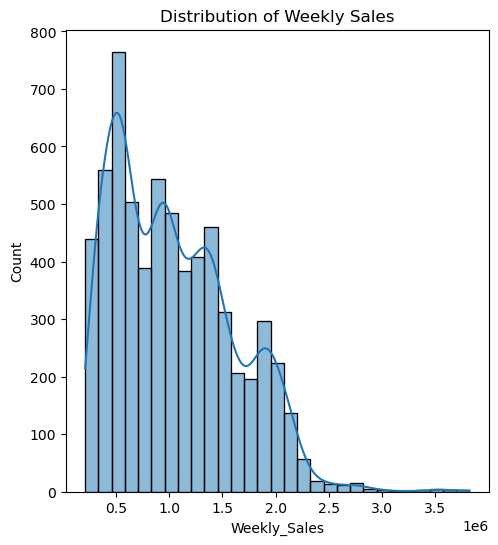

In [10]:
#visualization to show the distribution of weekly sales
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
sns.histplot(df['Weekly_Sales'], bins=29, kde=True)
plt.title('Distribution of Weekly Sales')
plt.show()


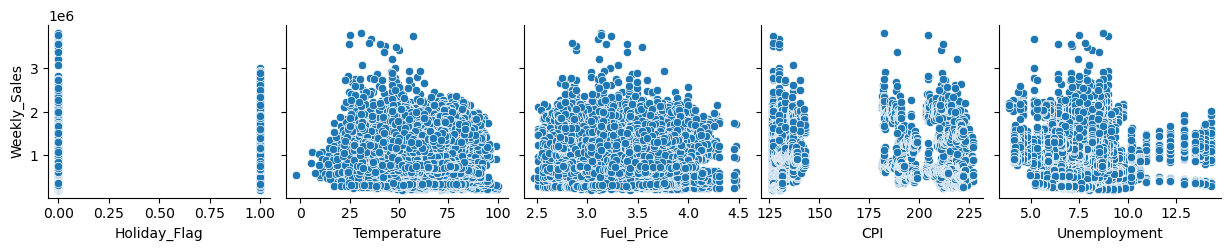

In [11]:
#scatterplot of each column
sns.pairplot(df, x_vars=['Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment'], 
             y_vars=['Weekly_Sales'], kind='scatter')

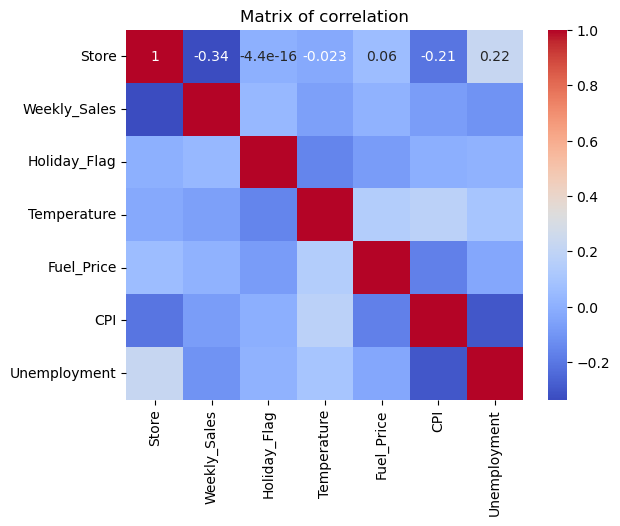

In [12]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matrix of correlation');

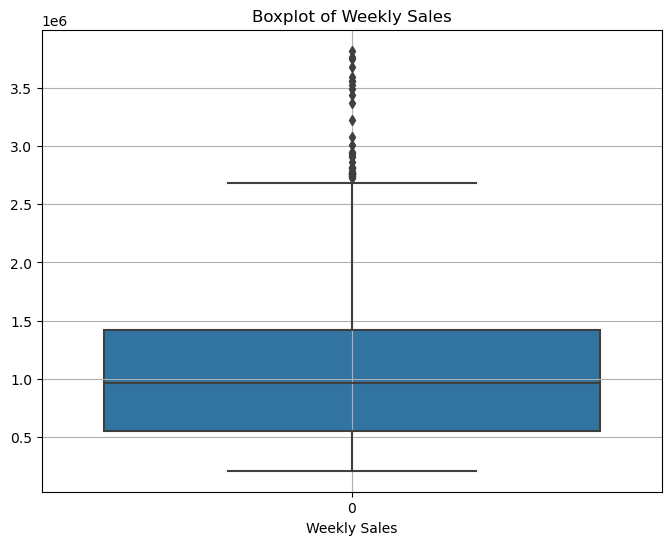

In [13]:
#boxplot of weekly sales
plt.figure(figsize=(8, 6))
sns.boxplot(df['Weekly_Sales'])
plt.title('Boxplot of Weekly Sales')
plt.xlabel('Weekly Sales')
plt.grid(True)

In [15]:
#to find the boundaries of emissions. We calculate quartiles (Q1 and Q3)which is the  and interquartile range (IQR) for the "Weekly_Sales" column.
Q1 = df['Weekly_Sales'].quantile(0.25) # 25th quartile
Q3 = df['Weekly_Sales'].quantile(0.75) # 75th quartile

IQR = Q3 - Q1      # Interquartile range

lower_bound = Q1 - 1.5 * IQR  # Lower emission limit
upper_bound = Q3 + 1.5 * IQR  # Upper emission limit

In [18]:
#to filter the source data, leaving only those rows where the values of the "Weekly_Sales" column are within certain outlier boundaries.
cleaned_data = df[(df['Weekly_Sales'] >= lower_bound) & (df['Weekly_Sales'] <= upper_bound)]

In [19]:
#dividing them into train and test data sets 
X_cleaned = cleaned_data.drop('Weekly_Sales', axis=1)
y_cleaned = cleaned_data['Weekly_Sales']

In [20]:
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(X_cleaned, y_cleaned, test_size=0.1, random_state=101)
                                                                                    

In [22]:
#feature scaaling
scaler = StandardScaler()
X_train_scaled_cleaned = scaler.fit_transform(X_train_cleaned)
X_test_scaled_cleaned = scaler.transform(X_test_cleaned)


In [23]:
#Random Forest
RandomForest = RandomForestRegressor(random_state=101)


In [24]:
RandomForest.fit(X_train_scaled_cleaned, y_train_cleaned)

RandomForestRegressor(random_state=101)

In [25]:
y_pred_cleaned = RandomForest.predict(X_test_scaled_cleaned)

In [26]:
#Model Evaluation
MAE = mean_absolute_error(y_test_cleaned, y_pred_cleaned)

In [27]:
RMSE = np.sqrt(mean_squared_error(y_test_cleaned, y_pred_cleaned))

In [29]:
print(MAE)
print(RMSE)
np.mean(df['Weekly_Sales'])

67115.3583098284
116598.71186375586


1046964.8775617715